In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('sign_mnist_train.csv')
print(df.shape)
df.head()

(27455, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


## Data Preprocessing

In [4]:
labels = df['label'].values

In [5]:
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

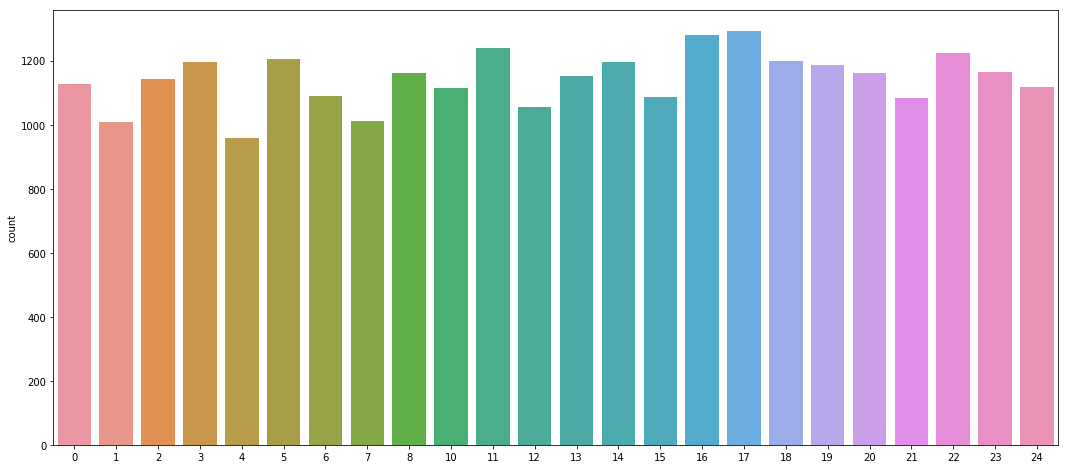

In [7]:
plt.figure(figsize = (18,8))
sns.countplot(x =labels)

In [8]:
df.drop(["label"], inplace=True, axis=1)

In [9]:
images = np.array(df.iloc[:, :])
images = np.array([np.reshape(i, (28, 28)) for i in images])
images_flat = np.array([i.flatten() for i in images])

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
images_scaled = scaler.fit_transform(images_flat)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images_scaled, labels, test_size=0.25, random_state=42)

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=120)

## View image through imshow()

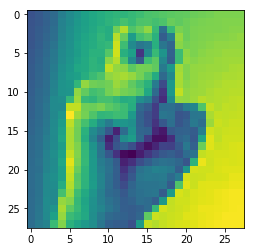

In [48]:
plt.imshow(images[23].reshape(28,28))

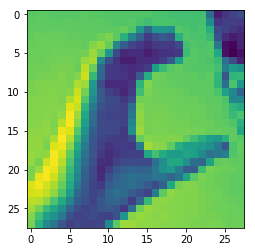

In [49]:
plt.imshow(images[2].reshape(28,28))

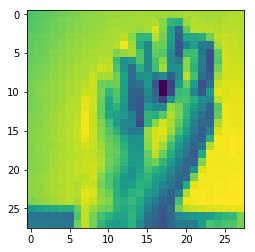

In [50]:
plt.imshow(images[4].reshape(28,28))

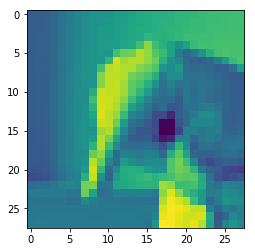

In [51]:
plt.imshow(images[15].reshape(28,28))

## Random Forest Classifier

In [15]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=20)

In [17]:
from sklearn.pipeline import Pipeline

pipe = Pipeline(steps=[('pca', pca), ('forest', forest)])

In [18]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=120, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('forest', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
       ...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

## Accuracy of Random Forest Classifier

In [21]:
# 1. Using accuracy_score

In [26]:
from sklearn.metrics import accuracy_score

test_predictions = pipe.predict(X_test)
precision = accuracy_score(y_test, test_predictions) * 100
print("Accuracy with RandomForest: {0:.6f}%".format(precision))

Accuracy with RandomForest: 100.000000%


In [22]:
# 2. Using AUC

In [33]:
from sklearn.metrics import f1_score

test_predictions = pipe.predict(X_test)
precision = f1_score(test_predictions, y_test, average='weighted') * 100
print("Accuracy with RandomForest: {0:.6f}%".format(precision))

Accuracy with RandomForest: 100.000000%
